# python与numpy基础

寒小阳(2016年6月)

## Python介绍

如果你问我没有编程基础，想学习一门语言，我一定会首推给你Python<br>
类似伪代码的书写方式，让你能够集中精力去解决问题，而不是花费大量的时间在开发和debug上<br>
同时得益于Numpy/Scipy这样的科学计算库，使得其有非常高效和简易的科学计算能力。<br>
而活跃的社区提供的各种可视化的库，也使得 机器学习/数据挖掘 的全过程(数据采集，数据清洗，数据处理，建模，可视化)可以非常流畅地完成。<br>
而近年来极其热门的深度学习开源框架，基本都有python接口，google的Tensorflow更是python主导。

这个教程里面的内容包括：

* 基本Python语法: 基本数据类型 (Containers, Lists, Dictionaries, Sets, Tuples), 函数, 类
* Numpy: Arrays/数组, Array indexing/数组取值, Datatypes, Array math, Broadcasting

## 基本python语法

Python确实经常被人像伪代码，下面是一个快排程序，你可以感受一下:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) / 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print quicksort([3,6,9, 8,10,1,2,1])

[1, 1, 2, 3, 6, 8, 9, 10]


### 基本数据类型

#### 数值型

整型和浮点型以及基本的运算大家应该都知道：

In [2]:
x = 4
print x, type(x)

4 <type 'int'>


In [3]:
print x + 1   # 加;
print x - 1   # 减;
print x * 2   # 乘;
print x ** 2  # 指数;

5
3
8
16


In [4]:
x += 1
print x  # 自加
x *= 2
print x  # 自乘

5
10


In [5]:
y = 2.5
print type(y) # 输出类型
print y, y + 1, y * 2, y ** 2 # 连续输出

<type 'float'>
2.5 3.5 5.0 6.25


不过需要提醒一句，用习惯C++和Java的同学，Python真的没有(x++)和(x--)这俩操作

#### 布尔型

用于指定真假的类型，布尔型，包含真（True）和假（False）:

In [6]:
t, f = True, False
print type(t) # Prints "<type 'bool'>"

<type 'bool'>


看看逻辑与或非这些操作

In [7]:
print t and f # Logical AND;
print t or f  # Logical OR;
print not t   # Logical NOT;
print t != f  # Logical XOR;

False
True
False
True


#### 字符串型

In [8]:
hello = 'hello'   # 实在想不出的时候就用hello world
world = "world"
print hello, len(hello) # 字符串长度

hello 5


In [9]:
hw = hello + ' ' + world  # 字符串拼接
print hw

hello world


In [10]:
hw12 = '%s %s %d' % (hello, world, 12)  # 类似sprintf的格式化输出
print hw12  # prints "hello world 12"

hello world 12


我能说什么，你面试的时候面试官最爱让你写的字符串操作，都是它自带的:

In [11]:
s = "hello"
print s.capitalize()  # 首字母大写
print s.upper()       # 全大写
print s.rjust(7)      # 靠右对齐
print s.center(7)     # 居中输出
print s.replace('l', '(ell)')  # 字符串替换
print '  world '.strip()  # 去掉两侧空白

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


其他你想要的字符串操作看[这里](https://docs.python.org/2/library/stdtypes.html#string-methods).

### 容器

内置的容器用得非常非常多，包括: lists, dictionaries, sets, and tuples.

#### Lists/列表

和你学数据结构里面数组长得一样的容器，但是操作可多多了:

In [12]:
xs = [3, 1, 2]   # 建一个列表
print xs, xs[2]
print xs[-1]     # 用-1表示最后一个元素，输出来

[3, 1, 2] 2
2


In [13]:
xs[2] = 'Hanxiaoyang'    # 有意思的是，Python的list居然可以有不同类型的元素
print xs

[3, 1, 'Hanxiaoyang']


In [14]:
xs.append('happy') # 可以用append在尾部添加元素
print xs  

[3, 1, 'Hanxiaoyang', 'happy']


In [15]:
x = xs.pop()     # 也可以把最后一个元素“弹射”出来
print x, xs 

happy [3, 1, 'Hanxiaoyang']


关于list更多的操作和内容可以看[这里](https://docs.python.org/2/tutorial/datastructures.html#more-on-lists).

#### 列表切片

这是大家最爱python list的原因之一，取东西太方便啦:

In [16]:
nums = range(5)    # 0-4
print nums         # 输出 "[0, 1, 2, 3, 4]"
print nums[2:4]    # 下标2到4(不包括)的元素，注意下标从0开始
print nums[2:]     # 下标2到结尾的元素; prints "[2, 3, 4]"
print nums[:2]     # 直到下标2的元素; prints "[0, 1]"
print nums[:]      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print nums[:-1]    # 直到倒数第一个元素; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # 也可以直接这么赋值
print nums         # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### 循环

可以对list立面的元素做一个循环:

In [17]:
animals = ['喵星人', '汪星人', '火星人']
for animal in animals:
    print animal

喵星人
汪星人
火星人


又要输出元素，又要输出下标怎么办，用 `enumerate` 函数:

In [18]:
animals = ['喵星人', '汪星人', '火星人']
for idx, animal in enumerate(animals):
    print '#%d: %s' % (idx + 1, animal)

#1: 喵星人
#2: 汪星人
#3: 火星人


#### List comprehensions:

如果对list里面的元素都做一样的操作，然后生成一个list，用它最快了，这绝对会成为你最爱的python操作之一:

In [19]:
# 求一个list里面的元素的平方，然后输出，很out的for循环写法
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print squares

[0, 1, 4, 9, 16]


用list comprehension可以这么写:

In [20]:
nums = [0, 1, 2, 3, 4]
# 对每个x完成一个操作以后返回来，组成新的list
squares = [x ** 2 for x in nums]
print squares

[0, 1, 4, 9, 16]


你甚至可以加条件，去筛出你想要的元素，去做你想要的操作:

In [21]:
nums = [0, 1, 2, 3, 4]
# 把所有的偶数取出来，平方后返回
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print even_squares

[0, 4, 16]


#### 字典

存储键值对(key => value)的数据结构, 类似Java中的`Map`，这真的是我使用频度相当高的数据结构:

In [22]:
d = {'cat': 'cute', 'dog': 'furry'}  # 建立字典
print d['cat']       # 根据key取value
print 'cat' in d     # 查一个元素是否在字典中

cute
True


In [23]:
d['fish'] = 'wet'    # 设定键值对
print d['fish']      # 这时候肯定是输出修改后的内容

wet


In [24]:
print d['monkey']  # 不是d的键，肯定输不出东西

KeyError: 'monkey'

In [25]:
print d.get('monkey', 'N/A')  # 可以默认输出'N/A'（取不到key对应的value值的时候）
print d.get('fish', 'N/A') 

N/A
wet


In [26]:
del d['fish']        # 删除字典中的键值对
print d.get('fish', 'N/A') # 这会儿就没有了

N/A


同样的，你其他想了解的字典相关的操作和内容可以看 [这里](https://docs.python.org/2/library/stdtypes.html#dict).

你可以这样循环python字典取出你想要的内容:

In [27]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print 'A %s has %d legs' % (animal, legs)

A person has 2 legs
A spider has 8 legs
A cat has 4 legs


用iteritems函数可以同时取出键值对:

In [28]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.iteritems():
    print 'A %s has %d legs' % (animal, legs)

A person has 2 legs
A spider has 8 legs
A cat has 4 legs


Dictionary comprehensions: 和list comprehension有点像啦，但是生成的是字典:

In [29]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print even_num_to_square

{0: 0, 2: 4, 4: 16}


#### Sets

你可以理解成没有相同元素的列表（当然，显然和list是不同的）:

In [30]:
animals = {'cat', 'dog'}
print 'cat' in animals   # Check if an element is in a set; prints "True"
print 'fish' in animals  # prints "False"


True
False


In [31]:
animals.add('fish')      # 添加元素
print 'fish' in animals
print len(animals)       # 元素个数

True
3


In [32]:
animals.add('cat')       # 如果元素已经在set里了，操作不会怎么样
print len(animals)       
animals.remove('cat')    # 删除一个元素
print len(animals)       

3
2


循环的方式和list很像啦:

In [33]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print '#%d: %s' % (idx + 1, animal)
# Prints "#1: fish", "#2: dog", "#3: cat"

#1: fish
#2: dog
#3: cat


Set comprehensions: 熟悉的感觉:

In [34]:
from math import sqrt
print {int(sqrt(x)) for x in range(30)}

set([0, 1, 2, 3, 4, 5])


#### 元组

和list很像，但是可以作为字典的key或者set的元素出现，但是一整个list不可以作为字典的key或者set的元素的:

In [35]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print type(t)
print d[t]       
print d[(1, 2)]

<type 'tuple'>
5
1


In [36]:
t[0] = 1

TypeError: 'tuple' object does not support item assignment

### 函数

用 `def` 就可以定义一个函数，就像下面这样:

In [37]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print sign(x)

negative
zero
positive


函数名字后面接的括号里，可以有多个参数，你自己可以试试:

In [38]:
def hello(name, loud=False):
    if loud:
        print 'HELLO, %s' % name.upper()
    else:
        print 'Hello, %s!' % name

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


### 类

Python的类，怎么说呢，比较简单粗暴:

In [39]:
class Greeter:

    # 构造函数
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # 类的成员函数
    def greet(self, loud=False):
        if loud:
            print 'HELLO, %s!' % self.name.upper()
        else:
            print 'Hello, %s' % self.name

g = Greeter('Fred')  # 构造一个类
g.greet()            # 调用函数; prints "Hello, Fred"
g.greet(loud=True)   # 调用函数; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


## Numpy

我们要开始接触高效计算库Numpy了，你要是之前在实验室用MATLAB之类的语法，你会发现Numpy和它们长得不要太像，爱MATLAB的同学，参考文档可以看[这里](http://wiki.scipy.org/NumPy_for_Matlab_Users)

python里面调用一个包，用import对吧, 所以我们import `numpy` 包:

In [40]:
import numpy as np

### Arrays/数组

看你数组的维度啦，我自己的话比较简单粗暴，一般直接把1维数组就看做向量/vector，2维数组看做2维矩阵，3维数组看做3维矩阵...

可以调用np.array去从list初始化一个数组:

In [41]:
a = np.array([1, 2, 3])  # 1维数组
print type(a), a.shape, a[0], a[1], a[2]
a[0] = 5                 # 重新赋值
print a                  

<type 'numpy.ndarray'> (3L,) 1 2 3
[5 2 3]


In [42]:
b = np.array([[1,2,3],[4,5,6]])   # 2维数组
print b

[[1 2 3]
 [4 5 6]]


In [43]:
print b.shape  #可以看形状的（非常常用！！！）                  
print b[0, 0], b[0, 1], b[1, 0]

(2L, 3L)
1 2 4


有一些内置的创建数组的函数:

In [44]:
a = np.zeros((2,2))  # 创建2x2的全0数组
print a

[[ 0.  0.]
 [ 0.  0.]]


In [45]:
b = np.ones((1,2))   # 创建1x2的全0数组
print b

[[ 1.  1.]]


In [46]:
c = np.full((2,2), 7) # 定值数组
print c 

[[ 7.  7.]
 [ 7.  7.]]


D:\Anaconda2\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((2, 2), 7) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [47]:
d = np.eye(2)        # 对角矩阵（对角元素为1）
print d

[[ 1.  0.]
 [ 0.  1.]]


In [48]:
e = np.random.random((2,2)) # 2x2的随机数组(矩阵)
print e

[[ 0.88332599  0.1743476 ]
 [ 0.31261891  0.0718507 ]]


一维数组的索引和切片

In [49]:
a = np.arange(9)

In [50]:
print a
print a[3:7]  #用下标3~7来选取元素3~6

[0 1 2 3 4 5 6 7 8]
[3 4 5 6]


In [51]:
print a[:7:2]  #用下标0~7，以2为步长选取元素

[0 2 4 6]


In [52]:
print a[::-1]  #用负数下标翻转数组

[8 7 6 5 4 3 2 1 0]


多维数组的切片和索引

In [53]:
b = np.arange(24).reshape(2,3,4) 

In [54]:
print b

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [55]:
print b.shape

(2L, 3L, 4L)


In [56]:
print b[0,0,0]

0


In [57]:
print b[:,0,0] 

[ 0 12]


In [58]:
print b[0] 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [59]:
print b[0, :, :] 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [60]:
print b[0, ...]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [61]:
print b[0,1] 

[4 5 6 7]


In [62]:
print b[0,1,::2]  #数组切片中间隔地选定元素

[4 6]


In [63]:
print b[...,1]    #选取位于第2列的元素

[[ 1  5  9]
 [13 17 21]]


In [64]:
print b[:,1]      #选取位于第2行的元素

[[ 4  5  6  7]
 [16 17 18 19]]


In [65]:
print b[0,:,1]    #选取第一单元第二列的元素

[1 5 9]


In [66]:
print b[0,:,-1]   #选取第一单元最后一列元素

[ 3  7 11]


In [67]:
print b[0,::-1, -1]  #反向选取第一单元最后一列元素

[11  7  3]


In [68]:
print b[0,::2,-1]   #数组切片中间隔地选定元素

[ 3 11]


In [69]:
print b[::-1]     #翻转元素的顺序

[[[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]


改变数组的维度

In [70]:
print b

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [71]:
print b.ravel()  #数组展平

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [72]:
print b.flatten()  #与ravel函数的功能相同,而flatten函数会请求分配内存来保存结果，而ravel函数只是返回数组的一个视图

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [73]:
b.shape = (6,4)  #用元组设置维度
print b

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [74]:
print b.transpose()  #矩阵转置

[[ 0  4  8 12 16 20]
 [ 1  5  9 13 17 21]
 [ 2  6 10 14 18 22]
 [ 3  7 11 15 19 23]]


In [75]:
print b.T  #矩阵转置

[[ 0  4  8 12 16 20]
 [ 1  5  9 13 17 21]
 [ 2  6 10 14 18 22]
 [ 3  7 11 15 19 23]]


In [76]:
b.resize((2,12))  #和reshape函数的功能一样，但resize会直接修改所操作的数组
print b

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]]


组合数组

In [77]:
a = np.arange(9).reshape(3,3)
print a

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [78]:
b = 2 * a
print b

[[ 0  2  4]
 [ 6  8 10]
 [12 14 16]]


In [79]:
print np.hstack((a, b))   #水平组合

[[ 0  1  2  0  2  4]
 [ 3  4  5  6  8 10]
 [ 6  7  8 12 14 16]]


In [80]:
print np.concatenate((a, b), axis=1)   #水平组合

[[ 0  1  2  0  2  4]
 [ 3  4  5  6  8 10]
 [ 6  7  8 12 14 16]]


In [81]:
print np.vstack((a, b))  #垂直组合

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 0  2  4]
 [ 6  8 10]
 [12 14 16]]


In [82]:
print np.concatenate((a, b), axis = 0)  #垂直组合

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 0  2  4]
 [ 6  8 10]
 [12 14 16]]


In [83]:
print np.dstack((a, b))  #深度组合，深度组合就是将一系列数组沿着纵轴（深度）方向进行层叠组合

[[[ 0  0]
  [ 1  2]
  [ 2  4]]

 [[ 3  6]
  [ 4  8]
  [ 5 10]]

 [[ 6 12]
  [ 7 14]
  [ 8 16]]]


In [84]:
oned = np.arange(2)
print oned

[0 1]


In [85]:
twice_oned = 2 * oned
print twice_oned

[0 2]


In [86]:
print np.column_stack((oned, twice_oned))   #列组合,对于一维数组将按列方向进行组合

[[0 0]
 [1 2]]


In [87]:
print np.column_stack((a, b)) 

[[ 0  1  2  0  2  4]
 [ 3  4  5  6  8 10]
 [ 6  7  8 12 14 16]]


In [88]:
print np.column_stack((a, b)) == np.hstack((a, b))

[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


In [89]:
print np.row_stack((oned, twice_oned))  #行组合，按行方向进行组合的函数

[[0 1]
 [0 2]]


In [90]:
print np.row_stack((a, b))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 0  2  4]
 [ 6  8 10]
 [12 14 16]]


In [91]:
print np.row_stack((a,b)) == np.vstack((a, b))

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


分割数组

In [92]:
print a

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [93]:
print np.hsplit(a, 3)  #水平分割,将把数组沿着水平方向分割为3个相同大小的子数组

[array([[0],
       [3],
       [6]]), array([[1],
       [4],
       [7]]), array([[2],
       [5],
       [8]])]


In [94]:
print np.split(a, 3, axis=1)  #指定参数axis=1

[array([[0],
       [3],
       [6]]), array([[1],
       [4],
       [7]]), array([[2],
       [5],
       [8]])]


In [95]:
print a
print np.vsplit(a, 3)  #垂直分割，将把数组沿着垂直方向分割

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[array([[0, 1, 2]]), array([[3, 4, 5]]), array([[6, 7, 8]])]


In [96]:
print np.split(a, 3, axis=0)  ##指定参数axis=0

[array([[0, 1, 2]]), array([[3, 4, 5]]), array([[6, 7, 8]])]


In [97]:
c = np.arange(27).reshape(3, 3, 3)
print c

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


In [98]:
print np.dsplit(c, 3)  #深度分割，dsplit函数将按深度方向分割数组

[array([[[ 0],
        [ 3],
        [ 6]],

       [[ 9],
        [12],
        [15]],

       [[18],
        [21],
        [24]]]), array([[[ 1],
        [ 4],
        [ 7]],

       [[10],
        [13],
        [16]],

       [[19],
        [22],
        [25]]]), array([[[ 2],
        [ 5],
        [ 8]],

       [[11],
        [14],
        [17]],

       [[20],
        [23],
        [26]]])]


数组属性

In [99]:
b = np.arange(24).reshape(2,12)
print b

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]]


In [100]:
print b.ndim  #给出数组的维数，或数组轴的个数

2


In [101]:
print b.size  #给出数组元素的总个数

24


In [102]:
print b.itemsize  #给出数组中的元素在内存中所占的字节数

4


In [103]:
print b.nbytes   #整个数组所占的存储空间,就是itemsize和size属性值的乘积

96


In [104]:
b = np.array([1.j + 1, 2.j + 3])  #创建一个由复数构成的数组
print b
print b.real  #虚数实部
print b.imag  #虚数虚部

[ 1.+1.j  3.+2.j]
[ 1.  3.]
[ 1.  2.]


In [105]:
b = np.arange(4).reshape(2,2) 
print b

[[0 1]
 [2 3]]


In [106]:
f = b.flat  #flat属性将返回一个numpy.flatiter对象
print f

In [107]:
for item in f:
    print item

0
1
2
3


In [108]:
print b.flat[2]   #用flatiter对象直接获取一个数组元素
print b.flat[[1,3]] 

2
[1 3]


In [109]:
print b
print '********'
b.flat = 7  #flat属性是一个可赋值的属性。对flat属性赋值将导致整个数组的元素都被覆盖
print b
print '********'
b.flat[[1,3]] = 1  
print b

[[0 1]
 [2 3]]
********
[[7 7]
 [7 7]]
********
[[7 1]
 [7 1]]


数组转换

In [110]:
b = np.array([ 1.+1.j, 3.+2.j]) 
print b

[ 1.+1.j  3.+2.j]


In [111]:
print b.tolist()   #数组转换成列表

[(1+1j), (3+2j)]


In [112]:
print b.astype(int)  #astype函数可以在转换数组时指定数据类型

[1 3]


D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [113]:
print b.astype('complex') 

[ 1.+1.j  3.+2.j]


读写文件

In [114]:
i2 = np.eye(2)  
print i2 
np.savetxt("eye.txt", i2)

[[ 1.  0.]
 [ 0.  1.]]


数组的修剪和压缩

In [115]:
a = np.arange(5)  
print "a =", a 
print "Clipped", a.clip(1, 2) #clip,将所有比给定最大值还大的元素全部设为给定的最大值，而所有比给定最小值还小的元素全部设为给定的最小值

a = [0 1 2 3 4]
Clipped [1 1 2 2 2]


In [116]:
a = np.arange(4)  
print a 
print "Compressed", a.compress(a > 2)   # compress方法返回一个根据给定条件筛选后的数组

[0 1 2 3]
Compressed [3]


计算阶乘 

In [117]:
b = np.arange(1, 9) 
print "b =", b 
print "Factorial", b.prod()   #计算8的阶乘

b = [1 2 3 4 5 6 7 8]
Factorial 40320


In [118]:
print "Factorials", b.cumprod()  #调用cumprod方法，计算数组元素的累积乘积

Factorials [    1     2     6    24   120   720  5040 40320]


### Array indexing/数组取值

Numpy提供了蛮多种取值的方式的.

可以像list一样切片（多维数组可以从各个维度同时切片）:

In [119]:
import numpy as np

# 创建一个如下格式的3x4数组
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# 在两个维度上分别按照[:2]和[1:3]进行切片，取需要的部分
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print b

[[2 3]
 [6 7]]


虽然，怎么说呢，不建议你这样去赋值，但是你确实可以修改切片出来的对象，然后完成对原数组的赋值.

In [120]:
print a[0, 1]  
b[0, 0] = 77    # b[0, 0]改了，很遗憾a[0, 1]也被修改了
print a[0, 1] 

2
77


In [121]:
# 创建3x4的2维数组/矩阵
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print a

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


你就放心大胆地去取你想要的数咯:

In [122]:
row_r1 = a[1, :]    # 第2行，但是得到的是1维输出（列向量）
row_r2 = a[1:2, :]  # 1x2的2维输出
row_r3 = a[[1], :]  # 同上
print row_r1, row_r1.shape 
print row_r2, row_r2.shape
print row_r3, row_r3.shape

[5 6 7 8] (4L,)
[[5 6 7 8]] (1L, 4L)
[[5 6 7 8]] (1L, 4L)


In [123]:
# 试试在第2个维度上切片也一样的:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print col_r1, col_r1.shape
print
print col_r2, col_r2.shape

[ 2  6 10] (3L,)

[[ 2]
 [ 6]
 [10]] (3L, 1L)


下面这个高级了，更自由地取值和组合，但是要看清楚一点:

In [124]:
a = np.array([[1,2], [3, 4], [5, 6]])

# 其实意思就是取(0,0),(1,1),(2,0)的元素组起来
print a[[0, 1, 2], [0, 1, 0]]

# 下面这个比较直白啦
print np.array([a[0, 0], a[1, 1], a[2, 0]])

[1 4 5]
[1 4 5]


In [125]:
# 再来试试
print a[[0, 0], [1, 1]]

# 还是一样
print np.array([a[0, 1], a[0, 1]])

[2 2]
[2 2]


In [126]:
# 再来熟悉一下
# 先创建一个2维数组
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print a

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [127]:
# 用下标生成一个向量
b = np.array([0, 2, 0, 1])

# 你能看明白下面做的事情吗？
print a[np.arange(4), b]  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [128]:
# 既然可以取出来，我们当然可以对这些元素操作咯
a[np.arange(4), b] += 10
print a

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


比较fashion的取法之一，用条件判定去取（但是很好用）:

In [129]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # 就是判定一下是否大于2

print bool_idx  # 返回一个布尔型的3x2数组

[[False False]
 [ True  True]
 [ True  True]]


In [130]:
# 用刚才的布尔型数组作为下标就可以去除符合条件的元素啦
print a[bool_idx]

# 其实一句话也可以完成是不是？
print a[a > 2]

[3 4 5 6]
[3 4 5 6]


那个，真的，其实还有很多细节，其他的方式去取值，你可以看看官方文档。

我们一起来来总结一下，看下面切片取值方式（对应颜色是取出来的结果）：

![](http://old.sebug.net/paper/books/scipydoc/_images/numpy_intro_02.png)
![](http://old.sebug.net/paper/books/scipydoc/_images/numpy_intro_03.png)

矩阵

In [131]:
A = np.mat('1 2 3; 4 5 6; 7 8 9')   #调用mat函数创建矩阵
print "Creation from string\n", A 

Creation from string
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [132]:
print "transpose A\n", A.T   #用T属性获取转置矩阵

transpose A
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [133]:
print "Inverse A\n", A.I   #用I属性获取逆矩阵

Inverse A
[[ -4.50359963e+15   9.00719925e+15  -4.50359963e+15]
 [  9.00719925e+15  -1.80143985e+16   9.00719925e+15]
 [ -4.50359963e+15   9.00719925e+15  -4.50359963e+15]]


In [134]:
print "Creation from array\n", np.mat(np.arange(9).reshape(3, 3))   #使用NumPy数组进行创建矩阵

Creation from array
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [135]:
A = np.eye(2)  
print "A\n", A 

A
[[ 1.  0.]
 [ 0.  1.]]


In [136]:
B = 2 * A  
print "B\n", B 

B
[[ 2.  0.]
 [ 0.  2.]]


In [137]:
print "Compound matrix\n", np.bmat("A B; A B")   #使用字符串创建复合矩阵

Compound matrix
[[ 1.  0.  2.  0.]
 [ 0.  1.  0.  2.]
 [ 1.  0.  2.  0.]
 [ 0.  1.  0.  2.]]


In [138]:
A = np.mat("0 1 2;1 0 3;4 -3 8")  
print "A\n", A

A
[[ 0  1  2]
 [ 1  0  3]
 [ 4 -3  8]]


In [139]:
inverse = np.linalg.inv(A)  
print "inverse of A\n", inverse   #求矩阵的逆

inverse of A
[[-4.5  7.  -1.5]
 [-2.   4.  -1. ]
 [ 1.5 -2.   0.5]]


In [140]:
print "Check\n", A * inverse   #逆矩阵的检验

Check
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


在 add 上调用通用函数的方法

In [141]:
a = np.arange(9) 
print "Reduce", np.add.reduce(a)   #其对数组的reduce计算结果等价于对数组元素求和

Reduce 36


In [142]:
print "Accumulate", np.add.accumulate(a)  #同样可以递归作用于输入数组,与reduce方法不同的是，它将存储运算的中间结果并返回

Accumulate [ 0  1  3  6 10 15 21 28 36]


In [143]:
print "Reduceat", np.add.reduceat(a, [0, 5, 2, 7]) 

Reduceat [10  5 20 15]


Reduceat [10 5 20 15] 
第一步用到索引值列表中的0和5，实际上就是对数组中索引值在0到5之间的元素进行reduce
操作。 
print "Reduceat step I", np.add.reduce(a[0:5]) 
第一步的输出如下：  
Reduceat step I 10 
第二步用到索引值5和2。由于2比5小，所以直接返回索引值为5的元素：  
print "Reduceat step II", a[5] 
第二步的结果如下：  
Reduceat step II 5 
第三步用到索引值2和7。这一步是对索引值在2到7之间的数组元素进行reduce操作：  
print "Reduceat step III", np.add.reduce(a[2:7]) 
第三步的结果如下：  
Reduceat step III 20 
第四步用到索引值7。这一步是对索引值从7开始直到数组末端的元素进行reduce操作：  
print "Reduceat step IV", np.add.reduce(a[7:]) 
第四步的结果如下：  
Reduceat step IV 15 

In [144]:
print "Outer\n", np.add.outer(np.arange(3), a)   # outer方法返回一个数组，它的秩（rank）等于两个输入数组的秩的和

Outer
[[ 0  1  2  3  4  5  6  7  8]
 [ 1  2  3  4  5  6  7  8  9]
 [ 2  3  4  5  6  7  8  9 10]]


### Datatypes

我们可以用dtype来看numpy数组中元素的类型:

In [145]:
x = np.array([1, 2])  # numpy构建数组的时候自己会确定类型
y = np.array([1.0, 2.0])
z = np.array([1, 2], dtype=np.int64)# 指定用int64构建

print x.dtype, y.dtype, z.dtype

int32 float64 int64


更多的内容可以读读[文档](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### 数学运算

下面这些运算才是你在科学运算中经常经常会用到的，比如逐个元素的运算如下:

In [146]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# 逐元素求和有下面2种方式
print x + y
print np.add(x, y)

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [147]:
# 逐元素作差
print x - y
print np.subtract(x, y)

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [148]:
# 逐元素相乘
print x * y
print np.multiply(x, y)

[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]


In [149]:
# 逐元素相除
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print x / y
print np.divide(x, y)

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [150]:
# 逐元素求平方根！！！
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print np.sqrt(x)

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


In [151]:
print np.remainder([4, 7], [2, 3])  #模运算

[0 1]


In [152]:
print np.remainder(np.arange(7), 5)  #求余数，相当于mod

[0 1 2 3 4 0 1]


In [153]:
print np.arange(7) % 5   #模运算

[0 1 2 3 4 0 1]


In [154]:
print np.mod([-3, -2, -1, 1, 2, 3], 2)  #余数的符号与除数一致

[1 0 1 1 0 1]


In [155]:
print np.mod([-3, -2, -1, 1, 2, 3], -2)

[-1  0 -1 -1  0 -1]


In [156]:
print np.fmod([-3, -2, -1, 1, 2, 3], 2)  ##余数的符号与被除数一致

[-1  0 -1  1  0  1]


In [157]:
print np.convolve([1, 2, 3], [0, 1, 0.5])  #卷积运算

[ 0.   1.   2.5  4.   1.5]


In [158]:
print np.convolve([1,2,3],[0,1,0.5], 'same')

[ 1.   2.5  4. ]


In [159]:
print np.convolve([1,2,3],[0,1,0.5], 'valid')

[ 2.5]


In [160]:
print np.maximum([2, 3, 4], [1, 5, 2])  #最大值，即每一列最大值

[2 5 4]


In [161]:
print np.maximum(np.eye(2), [0.5, 2]) # broadcasting

[[ 1.   2. ]
 [ 0.5  2. ]]


In [162]:
print np.minimum([2, 3, 4], [1, 5, 2])  #最小值

[1 3 2]


In [163]:
print np.minimum(np.eye(2), [0.5, 2]) # broadcasting

[[ 0.5  0. ]
 [ 0.   1. ]]


复数运算

In [164]:
print np.angle([1.0, 1.0j, 1+1j])  # in radians

[ 0.          1.57079633  0.78539816]


In [165]:
print np.angle(1+1j, deg=True)     # in degrees

45.0


In [166]:
a = np.array([1+2j, 3+4j, 5+6j])
print a.real, a.imag    #实部和虚部

[ 1.  3.  5.] [ 2.  4.  6.]


In [167]:
a.real = 9
a.imag = 10
print a

[ 9.+10.j  9.+10.j  9.+10.j]


In [168]:
a.real = np.array([9, 8, 7])
a.imag = np.array([6, 5, 4])
print a

[ 9.+6.j  8.+5.j  7.+4.j]


In [169]:
print np.conjugate(1+2j)  #共轭复数

(1-2j)


In [170]:
x = np.eye(2) + 1j * np.eye(2)
print np.conjugate(x)

[[ 1.-1.j  0.-0.j]
 [ 0.-0.j  1.-1.j]]


那如果我要做矩阵的乘法运算怎么办！！！恩，别着急，照着下面写就可以了:

In [171]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# 求向量内积
print v.dot(w)
print np.dot(v, w)

219
219


In [172]:
# 矩阵的乘法
print x.dot(v)
print np.dot(x, v)

[29 67]
[29 67]


In [173]:
# 矩阵的乘法
# [[19 22]
#  [43 50]]
print x.dot(y)
print np.dot(x, y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


你猜你做科学运算会最常用到的矩阵内元素的运算是什么？对啦，是求和，用 `sum`可以完成:

In [174]:
x = np.array([[1,2],[3,4]])

print np.sum(x)  # 数组/矩阵中所有元素求和; prints "10"
print np.sum(x, axis=0)  # 按列去求和; prints "[4 6]"
print np.sum(x, axis=1)  # 按行去求和; prints "[3 7]"

10
[4 6]
[3 7]


In [175]:
print np.reciprocal(2.) #倒数

0.5


In [176]:
print np.reciprocal([1, 2., 3.33])

[ 1.         0.5        0.3003003]


In [177]:
print np.negative([1.,-1.])  #相反数

[-1.  1.]


In [178]:
print np.power(np.arange(6), 3)  #power(x, y),--->x.^y

[  0   1   8  27  64 125]


我想说最基本的运算就是上面这个样子，更多的运算可能得查查[文档](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

其实除掉基本运算，我们经常还需要做一些操作，比如矩阵的变形，转置和重排等等:

In [179]:
# 转置和数学公式一直，简单粗暴
print x
print x.T

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [180]:
# 需要说明一下，1维的vector转置还是自己
v = np.array([1,2,3])
print v 
print v.T

# 2维的就不一样了
w = np.array([[1,2,3]])
print w 
print w.T

[1 2 3]
[1 2 3]
[[1 2 3]]
[[1]
 [2]
 [3]]


In [181]:
print np.around([0.37, 1.64])

[ 0.  2.]


In [182]:
print np.around([0.37, 1.64], decimals=1)

[ 0.4  1.6]


In [183]:
print np.around([.5, 1.5, 2.5, 3.5, 4.5]) # rounds to nearest even value

[ 0.  2.  2.  4.  4.]


In [184]:
print np.around([1,2,3,11], decimals=-1)

[ 0  0  0 10]


In [185]:
a = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])

In [186]:
print np.rint(a)

[-2. -2.  0.  0.  2.  2.  2.]


In [187]:
print np.fix(3.14), np.fix(3)

3.0 3.0


In [188]:
print np.fix([2.1, 2.9, -2.1, -2.9])

[ 2.  2. -2. -2.]


In [189]:
print np.floor(a)

[-2. -2. -1.  0.  1.  1.  2.]


In [190]:
print np.ceil(a)

[-1. -1. -0.  1.  2.  2.  2.]


In [191]:
print np.trunc(a)

[-1. -1. -0.  0.  1.  1.  2.]


random模块

In [192]:
import random
print random.random()  #用于生成一个0到1的随机符点数

0.00400207685892


In [193]:
print random.uniform(10, 20)  #用于生成一个指定范围内的随机符点数，两个参数其中一个是上限，一个是下限
print random.uniform(20, 10)

14.5282370749
14.3177738484


In [194]:
print random.randint(12, 20)  #用于生成一个指定范围内的整数,其中参数a是下限，参数b是上限
print random.randint(20, 20)

15
20


In [195]:
print random.randint(20, 10)  # 该语句是错误的。下限必须小于上限

ValueError: empty range for randrange() (20,11, -9)

In [196]:
print random.randrange(10, 100, 2)  #从指定范围内，按指定基数递增的集合中 获取一个随机数

62


In [197]:
print random.choice("学习Python")  #从序列中获取一个随机元素
print random.choice(["JGood", "is", "a", "handsome", "boy"])
print random.choice(("Tuple", "List", "Dict"))  

y
JGood
Tuple


In [198]:
p = ["Python", "is", "powerful", "simple", "and so on..."]
print p
random.shuffle(p)  #用于将一个列表中的元素打乱
print p

['Python', 'is', 'powerful', 'simple', 'and so on...']
['powerful', 'simple', 'Python', 'is', 'and so on...']


In [199]:
list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
slice = random.sample(list, 5)  # 从list中随机获取5个元素，作为一个片断返回
print slice
print list  # 原有序列并没有改变

[4, 6, 1, 9, 7]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


numpy中随机数生成包random

In [200]:
import numpy as np
print np.random.randn(4)  #从标准正太分布中返回一个样本值
print np.random.randn(2, 3)

[ 0.27174989 -0.2458569   0.09074111  0.95311427]
[[ 1.45145071 -1.66998391  0.8143635 ]
 [ 0.22988877  1.80412361 -0.01598429]]


In [201]:
print np.random.randint(2, 9)  #从在在半开半闭区间[low,high)上的离散均匀分布中返回随机的整数
print np.random.randint(7)  #取值范围0~7
print np.random.randint(2, 9, 3)  #取三个范围为2~9的整数

3
0
[6 4 8]


In [202]:
print np.random.normal(6)  #从一个高斯（正态）分布中得到数据
print np.random.normal(1, 6)  #第一个参数：分布的均值中心；第二个参数：分布的标准差
print np.random.normal(1, 6, 3)

7.0157723323
0.848386729664
[ 0.73684588 -4.37538521 -1.74171382]


In [203]:
print np.random.random(10)  #生成长度为10，在[0,1)之间平均分布的随机数组
print np.random.random()

[ 0.3459637   0.51069298  0.72639499  0.66686729  0.49156596  0.73785388
  0.22884437  0.68732669  0.66935424  0.29678649]
0.965099193374


In [204]:
print 0.2 * np.random.random(10) - 0.1  #生成在-0.1到0.1之间的平均分布
print np.random.uniform(-0.1, 0.1, 10)

[ -6.98731363e-02  -8.55999600e-02   6.24665871e-02  -7.68655158e-03
   6.89735527e-02   9.16174192e-02   3.40365538e-02   7.12252546e-06
  -5.08028664e-02   5.72402453e-02]
[-0.05513945 -0.06099317  0.0647808  -0.05608504  0.03286601  0.02602861
 -0.02501202 -0.01944996  0.01185767  0.01886945]


In [205]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print np.random.choice(x)
print np.random.choice(x, 3)

7
[6 1 8]


In [206]:
xdt = np.random.choice(x, 4, replace = True)
xdf = np.random.choice(x, 4, replace = False)
print xdt
print xdf

[5 2 4 6]
[6 3 4 8]


Broadcasting

这个没想好哪个中文词最贴切，我们暂且叫它“传播吧”:<br>
作用是什么呢，我们设想一个场景，如果要用小的矩阵去和大的矩阵做一些操作，但是希望小矩阵能循环和大矩阵的那些块做一样的操作，那急需要Broadcasting啦

In [207]:
# 我们要做一件事情，给x的每一行都逐元素加上一个向量，然后生成y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # 生成一个和x维度一致的空数组/矩阵

# 比较粗暴的方式是，用for循环逐个相加
for i in range(4):
    y[i, :] = x[i, :] + v

print y

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


这种方法当然可以啦，问题是不高效嘛，如果你的x矩阵行数非常多，那就很慢的咯:<br>
咱们调整一下，先生成好要加的内容

In [208]:
vv = np.tile(v, (4, 1))  # 重复4遍v，叠起来
print vv                 # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [209]:
y = x + vv  # 这样求和大家都能看明白对吧
print y

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [210]:
import numpy as np

# 因为broadcasting的存在，你上面的操作可以简单地汇总成一个求和操作
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print y

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


当操作两个array时，numpy会逐个比较它们的shape，在下述情况下，两arrays会兼容和输出broadcasting结果：<br>

1. 相等
2. 其中一个为1，（进而可进行拷贝拓展已至，shape匹配）

比如求和的时候有：
```python
Image (3d array):  256 x 256 x 3
Scale (1d array):              3
Result (3d array): 256 x 256 x 3

A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (2d array):  15 x 3 x 5
B      (1d array):  15 x 1 x 5
Result (2d array):  15 x 3 x 5
```

下面是一些 broadcasting 的例子:

In [211]:
# 我们来理解一下broadcasting的这种用法
v = np.array([1,2,3])  # v 形状是 (3,)
w = np.array([4,5])    # w 形状是 (2,)
# 先把v变形成3x1的数组/矩阵，然后就可以broadcasting加在w上了:
print np.reshape(v, (3, 1)) * w

[[ 4  5]
 [ 8 10]
 [12 15]]


In [212]:
# 那如果要把一个矩阵的每一行都加上一个向量呢
x = np.array([[1,2,3], [4,5,6]])
v = np.array([1,2,3])
# 恩，其实是一样的啦
print x + v

[[2 4 6]
 [5 7 9]]


In [213]:
x = np.array([[1,2,3], [4,5,6]]) # 2x3的
w = np.array([4,5])    # w 形状是 (2,)

# 自己算算看？
print (x.T + w).T

[[ 5  6  7]
 [ 9 10 11]]


In [214]:
# 上面那个操作太复杂了，其实我们可以直接这么做嘛
print x + np.reshape(w, (2, 1))

[[ 5  6  7]
 [ 9 10 11]]


In [215]:
# broadcasting当然可以逐元素运算了
print x * 2

[[ 2  4  6]
 [ 8 10 12]]


总结一下broadcasting，可以看看下面的图：<br>
![](http://www.astroml.org/_images/fig_broadcast_visual_1.png)

where的用法

In [216]:
x = np.arange(3, 15)
print x
print np.where(x > 6)  #返回满足条件的下标

[ 3  4  5  6  7  8  9 10 11 12 13 14]
(array([ 4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),)


In [217]:
x = np.arange(3, 18).reshape(3, 5)
print x
print np.where((x > 8) | (x == 6))

[[ 3  4  5  6  7]
 [ 8  9 10 11 12]
 [13 14 15 16 17]]
(array([0, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int64), array([3, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int64))


In [218]:
print x[np.where((x > 8) | (x == 6))]

[ 6  9 10 11 12 13 14 15 16 17]


In [219]:
print np.where((x > 8) | (x == 6), x, -1)   #将x中不满足条件的赋值为-1

[[-1 -1 -1  6 -1]
 [-1  9 10 11 12]
 [13 14 15 16 17]]


In [220]:
print np.where([[True, False], [True, True]],   #下面两个矩阵，设定对应位置为True，则第一个矩阵对应位置元素保留，否则用第二个矩阵元素
...          [[1, 2], [3, 4]],
...          [[9, 8], [7, 6]])

[[1 8]
 [3 4]]


In [1]:
import numpy as np
x = np.array([1,2])
print x.shape

(2L,)


In [2]:
y = np.expand_dims(x, axis=0)
print y
print y.shape

[[1 2]]
(1L, 2L)


In [3]:
y = np.expand_dims(x, axis=1)
print y
print y.shape

[[1]
 [2]]
(2L, 1L)


In [1]:
import numpy as np
a = np.arange(6).reshape(2,3)
print a
it = np.nditer(a, flags=['f_index'])
while not it.finished:
    print "%d <%d>" % (it[0], it.index)
    it.iternext()

[[0 1 2]
 [3 4 5]]
0 <0>
1 <2>
2 <4>
3 <1>
4 <3>
5 <5>


In [2]:
it = np.nditer(a, flags=['multi_index'])
while not it.finished:
    print "%d <%s>" % (it[0], it.multi_index)
    it.iternext()

0 <(0, 0)>
1 <(0, 1)>
2 <(0, 2)>
3 <(1, 0)>
4 <(1, 1)>
5 <(1, 2)>


In [6]:
it = np.nditer(a, flags=['multi_index'], op_flags=['writeonly'])
while not it.finished:
    it[0] = it.multi_index[1] - it.multi_index[0]
    print it.multi_index
    it.iternext()
    
print a

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
[[ 0  1  2]
 [-1  0  1]]


matplotlib.pyplot绘图

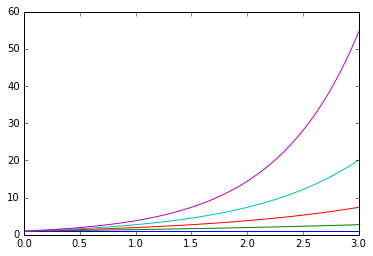

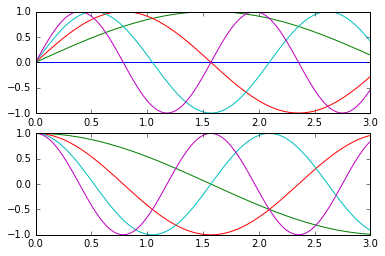

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1) # 创建图表1
plt.figure(2) # 创建图表2
ax1 = plt.subplot(211) # 在图表2中创建子图1
ax2 = plt.subplot(212) # 在图表2中创建子图2
x = np.linspace(0, 3, 100)
for i in xrange(5):
    plt.figure(1)  #❶ # 选择图表1
    plt.plot(x, np.exp(i * x / 3))
    plt.sca(ax1)   #❷ # 选择图表2的子图1
    plt.plot(x, np.sin(i * x))
    plt.sca(ax2)  # 选择图表2的子图2
    plt.plot(x, np.cos(i * x))
plt.show()

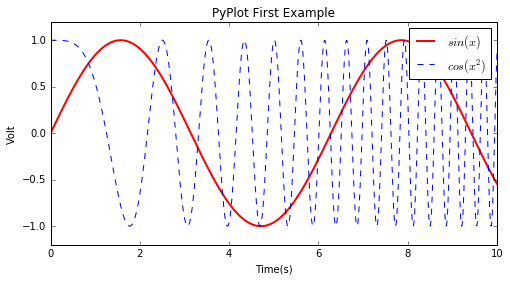

Figure(480x320)
Axes(0.125,0.125;0.775x0.775)
    agg_filter = None
    alpha = None
    animated = False
    axes = [<matplotlib.axes._subplots.AxesSubplot object at ...
    children = [<matplotlib.patches.Rectangle object at 0x0000000...
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    default_bbox_extra_artists = [<matplotlib.axes._subplots.AxesSubplot object at ...
    dpi = 80.0
    edgecolor = (1, 1, 1, 0)
    facecolor = (1, 1, 1, 0)
    figheight = 4.0
    figure = None
    figwidth = 6.0
    frameon = True
    gid = None
    label = 
    path_effects = []
    picker = None
    rasterized = None
    size_inches = [ 6.  4.]
    sketch_params = None
    snap = None
    tight_layout = False
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url = None
    visible = True
    window_extent = TransformedBbox(Bbox([[0.0, 0.0], [6.0, 4.0]]), Af...
    zorder = 0
None


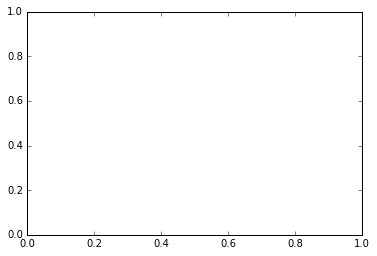

In [18]:
# -*- coding: utf-8 -*-
"""
绘制简单的曲线。
"""
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

x = np.linspace(0, 10, 1000)  #均分0~10为1000份
y = np.sin(x)
z = np.cos(x ** 2)

plt.figure(figsize=(8,4)) #figsize参数指定Figure对象的宽度和高度，其单位为英寸，图宽为8，高为4

plt.plot(x,y,label="$sin(x)$",color="red",linewidth=2) #label：给曲线指定一个标签名称，此标签将在图示中显示。如果标签字符串的前后有字符’$’，
                                                       #则matplotlib会使用其内嵌的LaTex引擎将其显示为数学公式。
                                                       #color：指定曲线的颜色，颜色可以用英文单词，或者以’#’字符开头的三个16进制数
                                                       #linewidth：指定曲线的宽度，可以不是整数，也可以使用缩写形式的参数名lw
            
plt.plot(x,z,"b--",label="$cos(x^2)$") #第三个参数’b–’指定曲线的颜色和线型，其中’b’表示蓝色，’–’表示线型为虚线。
                                       #在IPython中输入“plt.plot?”可以查看格式化字符串以及各个参数的详细说明。

plt.xlabel("Time(s)")  #xlabel：设置X轴的标题文字
plt.ylabel("Volt")     #ylabel：设置Y轴的标题文字
plt.title("PyPlot First Example")  #title：设置子图的标题
plt.ylim(-1.2,1.2)  #xlim、ylim：分别设置X、Y轴的显示范围
plt.legend()   #legend：显示图示，即图中表示每条曲线的标签(label)和样式的矩形区域

plt.show()  #调用plt.show()显示出绘图窗口。在通常的运行情况下，show()将会阻塞程序的运行，直到用户关闭绘图窗口。
            #然而在带“-wthread”等参数的IPython环境下，show()不会等待窗口关闭。
    
plt.savefig("test.png", dpi=120)  #保存图片
fig = plt.gcf()  #表示图表的Figure对象
axes = plt.gca()  #表示子图的Axes对象
print fig
print axes
print plt.getp(fig)  #通过getp()查看Figure对象的属性

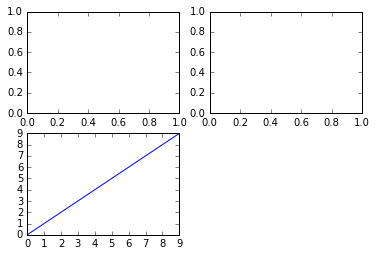

In [19]:
#plt.plot(np.arange(10))
#fig = plt.figure()
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
plt.plot(np.arange(10))
plt.show()

Line2D(_line0)
Line2D(_line0)


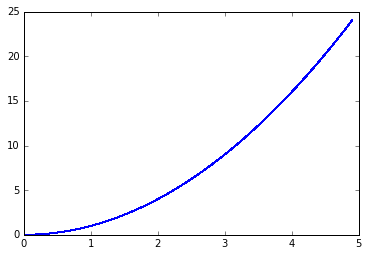

In [20]:
x = np.arange(0, 5, 0.1)
line = plt.plot(x, x*x)[0] # plot返回一个列表
print line
line.set_antialiased(False) # 调用Line2D对象的set_*()方法设置属性值
print line

1.0
r
    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = True
    axes = Axes(0.125,0.125;0.775x0.775)
    children = []
    clip_box = TransformedBbox(Bbox([[0.0, 0.0], [1.0, 1.0]]), Co...
    clip_on = True
    clip_path = None
    color or c = r
    contains = None
    dash_capstyle = butt
    dash_joinstyle = round
    data = (array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6, ...
    drawstyle = default
    figure = Figure(480x320)
    fillstyle = full
    gid = None
    label = _line1
    linestyle or ls = -
    linewidth or lw = 2.0
    marker = None
    markeredgecolor or mec = r
    markeredgewidth or mew = 0.5
    markerfacecolor or mfc = r
    markerfacecoloralt or mfcalt = none
    markersize or ms = 6.0
    markevery = None
    path = Path(array([[ 0.        ,  1.        ],        [ 0...
    path_effects = []
    picker = None
    pickradius = 5
    rasterized = None
    sketch_params = None
    snap = None
    solid_capstyle = projecting
   

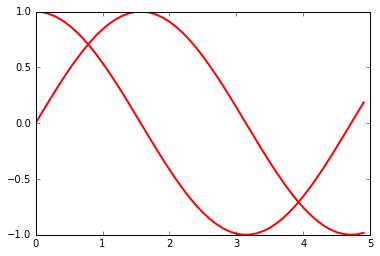

In [21]:
lines = plt.plot(x, np.sin(x), x, np.cos(x)) #同时绘制正弦和余弦两条曲线，lines是一个有两个Line2D对象的列表
plt.setp(lines, color="r", linewidth=2.0)  #调用setp()可以同时配置多个对象的属性，这里我们同时设置两条曲线的颜色和线宽
print line.get_linewidth()  #返回线宽属性
print plt.getp(lines[0], "color") # 返回color属性
print plt.getp(lines[1]) # 输出全部属性

绘制多子图
一个Figure对象可以包含多个子图(Axes)，在matplotlib中用Axes对象表示一个绘图区域，在本书中称之为子图。在前面的例子中，Figure对象只包括一个子图。我们可以使用subplot()快速绘制包含多个子图的图表，它的调用形式如下
subplot(numRows, numCols, plotNum)
图表的整个绘图区域被等分为numRows行和numCols列，然后按照从左到右、从上到下的顺序对每个区域进行编号，左上区域的编号为1。plotNum参数指定所创建Axes对象所在的区域。如果numRows、numCols和plotNum三个参数都小于10，则可以把它们缩写成一个整数，例如subplot(323)和subplot(3,2,3)的含义相同。如果新创建的子图和之前创建的子图区域有重叠的部分，则之前的子图将被删除。

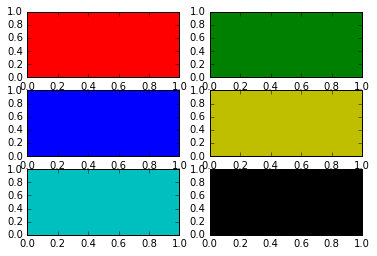

In [22]:
for idx, color in enumerate("rgbyck"):
    plt.subplot(321+idx, axisbg=color)
plt.show()

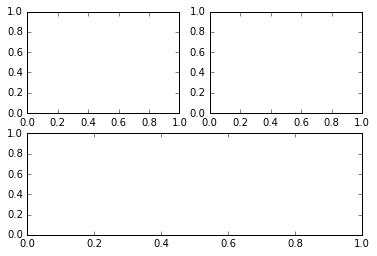

In [23]:
plt.subplot(221) # 第一行的左图
plt.subplot(222) # 第一行的右图
plt.subplot(212) # 第二整行
plt.show()

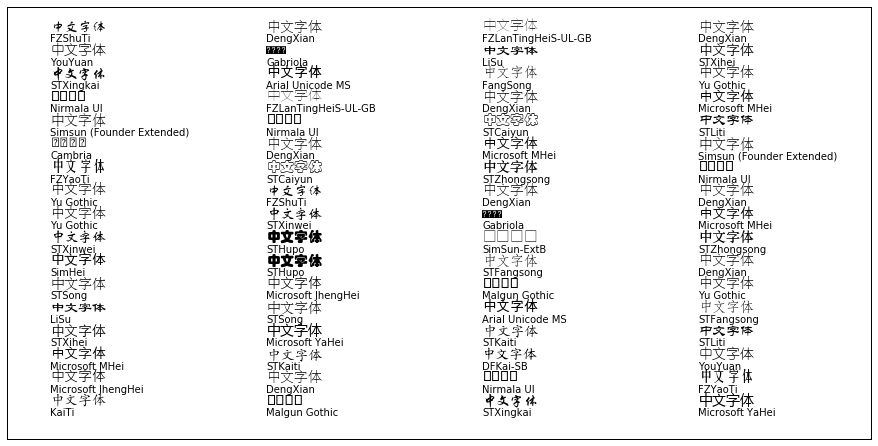

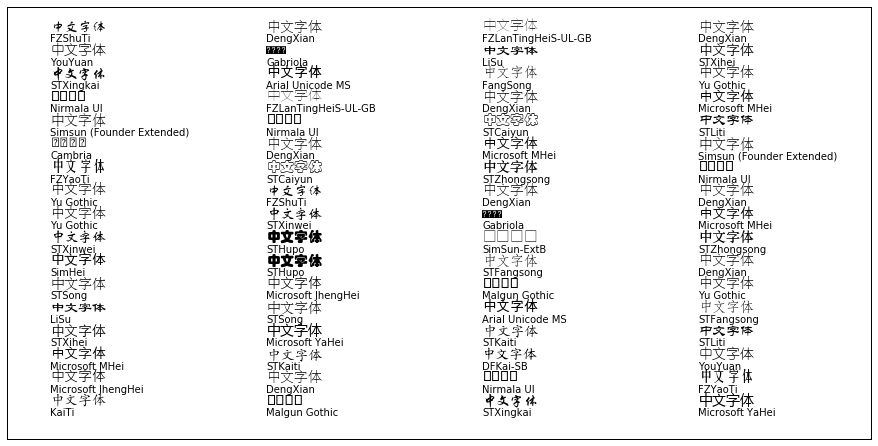

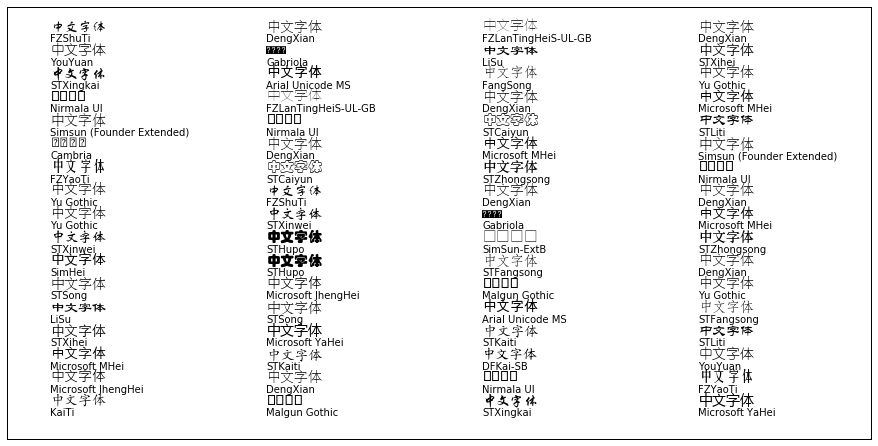

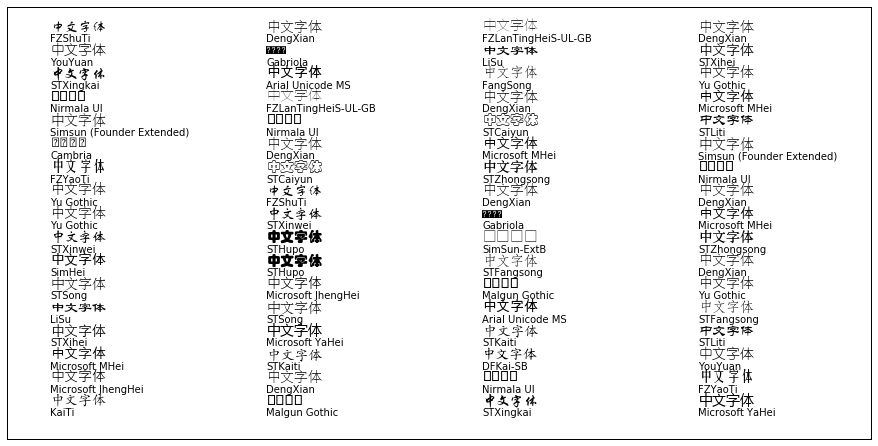

In [24]:
# -*- coding: utf-8 -*-
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt
import os
import os.path

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
plt.xticks([])
plt.yticks([])
x, y = 0.05, 0.08
fonts = [font.name for font in fontManager.ttflist if 
    os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts)
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0))
for font in fonts:
    t = ax.text(x, y, u"中文字体", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes)
    x += 0.25
    if x >= 1.0:
        y += dy
        x = 0.05
plt.show()  ## -*- coding: utf-8 -*-
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt
import os
import os.path

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
plt.xticks([])
plt.yticks([])
x, y = 0.05, 0.08
fonts = [font.name for font in fontManager.ttflist if 
    os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts)
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0))
for font in fonts:
    t = ax.text(x, y, u"中文字体", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes)
    x += 0.25
    if x >= 1.0:
        y += dy
        x = 0.05
plt.show()# -*- coding: utf-8 -*-
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt
import os
import os.path

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
plt.xticks([])
plt.yticks([])
x, y = 0.05, 0.08
fonts = [font.name for font in fontManager.ttflist if 
    os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts)
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0))
for font in fonts:
    t = ax.text(x, y, u"中文字体", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes)
    x += 0.25
    if x >= 1.0:
        y += dy
        x = 0.05
plt.show()  ## -*- coding: utf-8 -*-
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt
import os
import os.path

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
plt.xticks([])
plt.yticks([])
x, y = 0.05, 0.08
fonts = [font.name for font in fontManager.ttflist if 
    os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts)
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0))
for font in fonts:
    t = ax.text(x, y, u"中文字体", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes)
    x += 0.25
    if x >= 1.0:
        y += dy
        x = 0.05
plt.show()  #显示中文

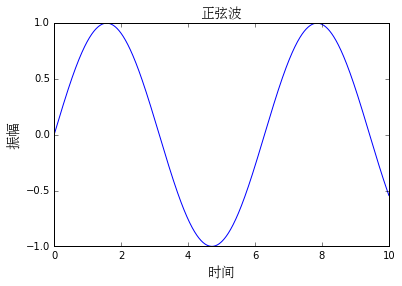

In [25]:
# -*- coding: utf-8 -*-
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) 
t = np.linspace(0, 10, 1000)
y = np.sin(t)
plt.plot(t, y)
plt.xlabel(u"时间", fontproperties=font) 
plt.ylabel(u"振幅", fontproperties=font)
plt.title(u"正弦波", fontproperties=font)
plt.show()

更多的numpy细节和用法可以查看一下官网[numpy指南](http://docs.scipy.org/doc/numpy/reference/)